<a href="https://colab.research.google.com/github/JuanPeralta-97/analitica_descriptiva_I/blob/main/EDA_visas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Andrea Cortes
# Juan peralta

## importacion de librerias

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy.stats import trim_mean

## Carga del data set

In [43]:
data_visas = pd.read_csv(
    "/content/Comportamiento_del_tr_mite_de_expedici_n_de_visa_colombiana_a_nacionales_de_Venezuela_20250224.csv",
    on_bad_lines='skip', engine = 'python', encoding='latin-1'
)

## Visualizacion inicial del data set

In [44]:
data_visas.head(10)

,Tipo de visa,Actividad de la visa,PaÃ­s de nacimiento,Sexo,Edad,Tiene Hijos,Nivel acadÃ©mico,Area conocimiento,Subarea conocimiento,Ciudad domicilio Colombia,Ciudad domicilio Colombia CÃ³digo,Departamento domicilio Colombia,Actividad en Colombia,OcupaciÃ³n en Colombia,Sector de actividad en Colombia,Tiene familiares residentes en Colombia,AÃ±o ExpediciÃ³n,Mes expediciÃ³n,Numero
0,NEGOCIOS,NE-1,ARGENTINA,M,49,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),CUCUTA,54001,NORTE DE SANTANDER,NO INDICA,NO REGISTRA,NO INDICA,NO,2014.0,1.0,1.0
1,NEGOCIOS,NE-1,ARGENTINA,M,52,NO,POSTGRADO - MAESTRIA,CIENCIAS DE LA SALUD,MEDICINA,BARRANQUILLA,8001,ATLANTICO,NO INDICA,NO REGISTRA,SERVICIOS,NO,2017.0,3.0,1.0
2,VISAS MIGRANTE,Cï¿½NYUGE DE NACIONALIDAD COLOMBIANO(A),VENEZUELA,M,69,NO,SIN PROFESIï¿½N,NINGUNA,NINGUNA,ARMENIA,63001,QUINDIO,TRABAJO,NO REGISTRA,SERVICIOS,NO,2023.0,10.0,1.0
3,NEGOCIOS,NE-1,CHILE,M,62,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),CUCUTA,54001,NORTE DE SANTANDER,NO INDICA,INGENIERO CIVIL,NO INDICA,NO,2014.0,2.0,1.0
4,VISAS MIGRANTE,TRABAJADOR,VENEZUELA,M,18,NO,SIN PROFESIï¿½N,NINGUNA,NINGUNA,BOGOTA D.C.,11001,CUNDINAMARCA,NO INDICA,HOGAR,NO INDICA,NO,2023.0,10.0,1.0
5,VISAS VISITANTE,ESTUDIANTE / VOLUNTARIO RELIGIOSO,VENEZUELA,F,24,NO,SIN PROFESIï¿½N,NINGUNA,NINGUNA,CALI,76001,VALLE DEL CAUCA,NO INDICA,RELIGIOSO,NO INDICA,NO,2023.0,10.0,1.0
6,VISAS MIGRANTE,TRABAJADOR,VENEZUELA,F,15,NO,SIN PROFESIï¿½N,NINGUNA,NINGUNA,BOGOTA D.C.,11001,CUNDINAMARCA,NO INDICA,ESTUDIANTE,NO INDICA,SI,2022.0,11.0,1.0
7,VISAS MIGRANTE,TRABAJADOR,VENEZUELA,F,5,NO,SIN PROFESIï¿½N,NINGUNA,NINGUNA,BOGOTï¿½ DC,11001,CUNDINAMARCA,NO INDICA,HOGAR,NO INDICA,NO,2022.0,11.0,1.0
8,NEGOCIOS,NE-1,CUBA,M,49,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),BOGOTA,11001,CUNDINAMARCA,NO INDICA,INGENIERO MECANICO,NO INDICA,NO,2013.0,9.0,1.0
9,NEGOCIOS,NE-1,CUBA,M,66,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),BOGOTA,11001,CUNDINAMARCA,NO INDICA,ECONOMISTA,NO INDICA,NO,2014.0,10.0,1.0


In [45]:
print(f'Cantidad de filas: {data_visas.shape[0]}')
print(f'Cantidad de columnas: {data_visas.shape[1]}')

Cantidad de filas: 229052
Cantidad de columnas: 19


In [46]:
print(data_visas.info())
# valores nulos especificos por columna print(data_visas.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229052 entries, 0 to 229051
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Tipo de visa                             229052 non-null  object 
 1   Actividad de la visa                     229052 non-null  object 
 2   PaÃ­s de nacimiento                      229051 non-null  object 
 3   Sexo                                     229051 non-null  object 
 4   Edad                                     229051 non-null  object 
 5   Tiene Hijos                              229050 non-null  object 
 6   Nivel acadÃ©mico                         229050 non-null  object 
 7   Area conocimiento                        229050 non-null  object 
 8   Subarea conocimiento                     229050 non-null  object 
 9   Ciudad domicilio Colombia                229050 non-null  object 
 10  Ciudad domicilio Colombia CÃ³dig

In [47]:
print(data_visas.describe())

       AÃ±o ExpediciÃ³n  Mes expediciÃ³n         Numero
count     229037.000000    229035.000000  229033.000000
mean        2018.164751         6.725562       1.027555
std            8.911742         3.425045       0.216740
min            1.000000         1.000000       1.000000
25%         2016.000000         4.000000       1.000000
50%         2018.000000         7.000000       1.000000
75%         2020.000000        10.000000       1.000000
max         2025.000000        12.000000      15.000000


## diagramas

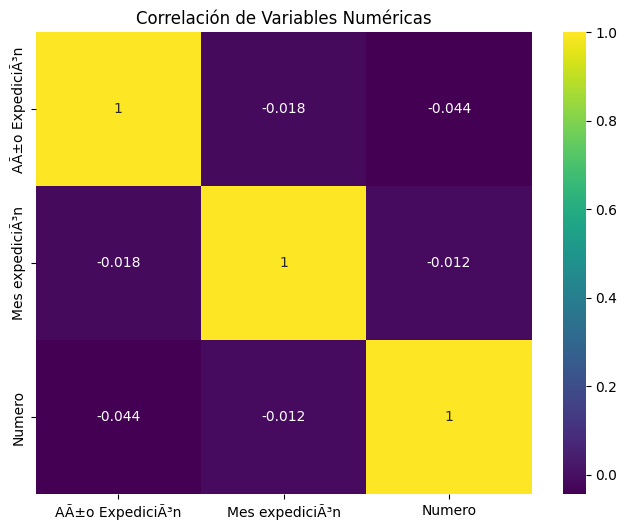

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# columnas numéricas
df_numeric = data_visas.select_dtypes(include=['float64'])

matriz_cor = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_cor, annot=True, cmap='viridis')
plt.title('Correlación de Variables Numéricas')
plt.show()

| Variable                                   | Tipo de Variable   | Subtipo             |
|--------------------------------------------|--------------------|---------------------|
| Tipo de visa                               | Cualitativa        | Nominal             |
| Actividad de la visa                       | Cualitativa        | Nominal             |
| País de nacimiento                         | Cualitativa        | Nominal             |
| Sexo                                       | Cualitativa        | Nominal             |
| Edad                                       | Cuantitativa       | Discreta            |
| Tiene Hijos                                | Cualitativa        | Nominal             |
| Nivel académico                            | Cualitativa        | Ordinal             |
| Área de conocimiento                       | Cualitativa        | Nominal             |
| Subárea de conocimiento                    | Cualitativa        | Nominal             |
| Ciudad domicilio Colombia                  | Cualitativa        | Nominal             |
| Departamento domicilio Colombia            | Cualitativa        | Nominal             |
| Actividad en Colombia                      | Cualitativa        | Nominal             |
| Ocupación en Colombia                      | Cualitativa        | Nominal             |
| Sector de actividad en Colombia            | Cualitativa        | Nominal             |
| Tiene familiares residentes                | Cualitativa        | Nominal             |
| Año Expedición                             | Cuantitativa       | Discreta            |
| Mes expedición                             | Cuantitativa       | Discreta    |
| Número                                     | Cuantitativa       | Discreta            |



# Estimadores centrales y analisis de variables cuantitativas

In [53]:
data_visas['Edad'] = pd.to_numeric(data_visas['Edad'], errors='coerce')
edad = data_visas['Edad']

# Media
media = np.mean(edad)
print(f'Media: {media}')

# Mediana
mediana = np.median(edad)
print(f'Mediana: {mediana}')

# Moda
moda = trim_mean(edad, 0.1)
print(f'Moda: {moda}')

# Rango
rango = np.max(edad) - np.min(edad)
print(f'Rango: {rango}')

# Desviacion estandar
desviacion_estandar = np.std(edad)
print(f'Desviación Estándar: {desviacion_estandar}')

Media: 36.83945302608255
Mediana: nan
Moda: 36.47110378624988
Rango: 5631.0
Desviación Estándar: 18.87638031296808


In [52]:
numero = data_visas['Numero']

# Media
media = np.mean(numero)
print(f'Media: {media}')

# Mediana
mediana = np.median(numero)
print(f'Mediana: {mediana}')

# Moda
moda = trim_mean(numero, 0.1)
print(f'Moda: {moda}')

Media: 1.0275549811599203
Mediana: nan
Moda: 1.0


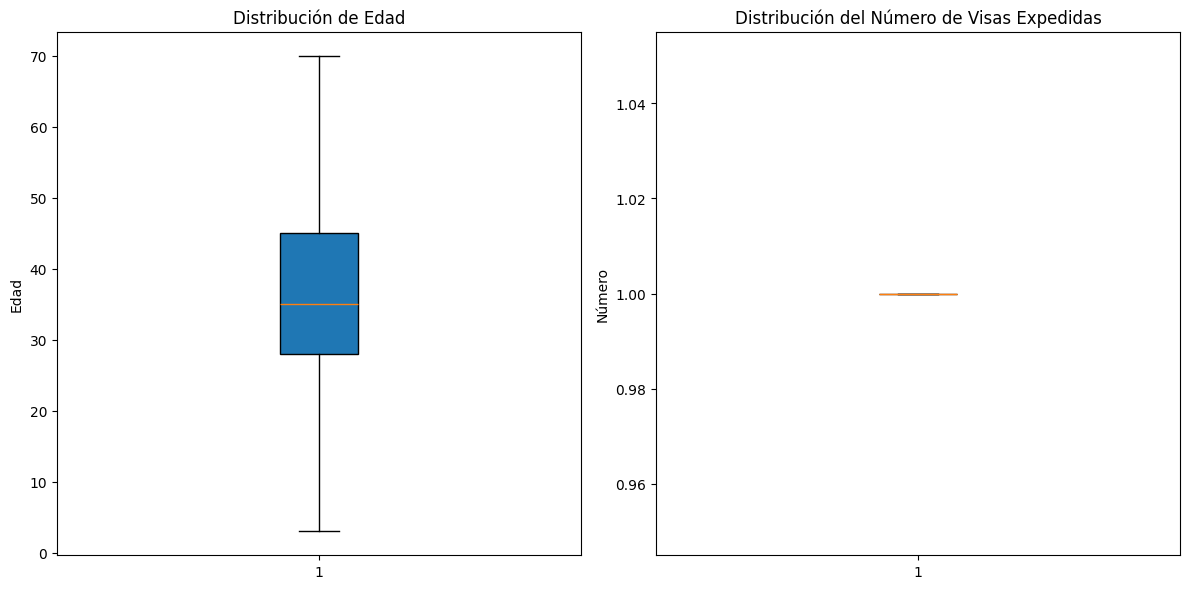

In [62]:
plt.figure(figsize=(12, 6))

# variable 'Edad'
plt.subplot(1, 2, 1)
plt.boxplot(data_visas['Edad'].dropna(), patch_artist=True, showfliers=False)
plt.title('Distribución de Edad')
plt.ylabel('Edad')

# variable 'Número'
plt.subplot(1, 2, 2)
plt.boxplot(data_visas['Numero'].dropna(), patch_artist=True, showfliers=False)
plt.title('Distribución del Número de Visas Expedidas')
plt.ylabel('Número')

plt.tight_layout()
plt.show()

# Analisis de variables cualitativas

In [64]:
# Sexo
freq_sexo = data_visas['Sexo'].value_counts(dropna=False)  # Frecuencias absolutas
freq_rel_sexo = data_visas['Sexo'].value_counts(normalize=True, dropna=False)  # Frecuencias relativas

print("=== Sexo ===")
print("Frecuencias Absolutas de Sexo:\n", freq_sexo)
print("Frecuencias Relativas de Sexo:\n", freq_rel_sexo, "\n")

# Tipo de visa
freq_tipo_visa = data_visas['Tipo de visa'].value_counts(dropna=False)
freq_rel_tipo_visa = data_visas['Tipo de visa'].value_counts(normalize=True, dropna=False)

print("=== Tipo de visa ===")
print("Frecuencias Absolutas de Tipo de visa:\n", freq_tipo_visa)
print("Frecuencias Relativas de Tipo de visa:\n", freq_rel_tipo_visa, "\n")

# Nivel académico
freq_nivel_academico = data_visas['Nivel acadÃ©mico'].value_counts(dropna=False)
freq_rel_nivel_academico = data_visas['Nivel acadÃ©mico'].value_counts(normalize=True, dropna=False)

print("=== Nivel académico ===")
print("Frecuencias Absolutas de Nivel académico:\n", freq_nivel_academico)
print("Frecuencias Relativas de Nivel académico:\n", freq_rel_nivel_academico, "\n")

=== Sexo ===
Frecuencias Absolutas de Sexo:
 Sexo
M                                                   121993
F                                                   107046
(NO R                                                    4
NB                                                       4
SABANETA                                                 1
7                                                        1
ECONOMï¿½A- ADMINISTRACIï¿½N CONTADURIA Y AFINES         1
None                                                     1
NINGUNA                                                  1
Name: count, dtype: int64
Frecuencias Relativas de Sexo:
 Sexo
M                                                   0.532600
F                                                   0.467344
(NO R                                               0.000017
NB                                                  0.000017
SABANETA                                            0.000004
7                                                  

In [69]:
# 1) Tipo de visa vs. Nivel académico
contingencia_visa = pd.crosstab(
    data_visas['Tipo de visa'],
    data_visas['Nivel acadÃ©mico'],
)
print("=== Tabla de Contingencia: Tipo de visa vs. Nivel académico ===")
print(contingencia_visa, "\n")

# 2) Sexo vs. Tipo de visa
contingencia_sexo = pd.crosstab(
    data_visas['Sexo'],
    data_visas['Tipo de visa'],
)
print("=== Tabla de Contingencia: Sexo vs. Tipo de visa ===")
print(contingencia_sexo)

=== Tabla de Contingencia: Tipo de visa vs. Nivel académico ===
Nivel acadÃ©mico  (NO REGISTRA)  0  11001  44430  BACHILLERATO  BOGOTA  \
Tipo de visa                                                             
6                             0  0      0      1             0       0   
NEGOCIOS                    248  0      0      0             0       0   
TEMPORAL                   8368  0      1      0            62       0   
TRASPASOS                   362  0      0      0             0       0   
VISAS MIGRANTE                0  0      0      0             0       0   
VISAS RESIDENTE            1172  1      0      0            11       1   
VISAS VISITANTE               0  0      0      0             0       0   

Nivel acadÃ©mico  DESCONOCIDO  POSTGRADO - DOCTORADO  \
Tipo de visa                                           
6                           0                      0   
NEGOCIOS                    0                     21   
TEMPORAL                    1                